In [ ]:
# changes are marked with * in code blocks and dots in markdown blocks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm 


import warnings
warnings.filterwarnings('ignore')

# 02.EDA
___


1. Univariate Analysis


* Data Dictionary 


|    | Column Name               | Description                                                                                                                                                       |
|---:|:--------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | Sex                       | Biological sex assigned at birth                                                                                                                                  |
|  1 | GeneralHealth             | Would you say that in general your health is: Excellent,Very good,Good,Fair,Poor                                                                                  |
|  2 | PhysicalHealthDays        | Including physical illness and injury, how many days during the past 30 days was your physical health not good?                                                   |
|  3 | MentalHealthDays          | Including stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?                              |
|  4 | LastCheckupTime           | How long has it been since you last visited a doctor for a routine checkup?                                                                                       |
|  5 | PhysicalActivities        | During the past month,did you participate in any physical activities for exercise                                                                                 |
|  6 | SleepHours                | On average, how many hours of sleep do you get in a 24-hour period?                                                                                               |
|  7 | RemovedTeeth              | Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?                    |
|  8 | HadHeartAttack            | Have you ever had a heart attack, also called a myocardial infarction                                                                                             |
|  9 | HadAngina                 | Have you ever had an angina or coronary heart disease?                                                                                                            |
| 10 | HadStroke                 | Have you ever had a stroke?                                                                                                                                       |
| 11 | HadAsthma                 | Do you have asthma?                                                                                                                                               |
| 12 | HadSkinCancer             | Have you had skin cancer that is not melanoma?                                                                                                                    |
| 13 | HadCOPD                   | Do you have C.O.P.D. (chronic obstructive pulmonary disease), emphysema or chronic bronchitis?                                                                    |
| 14 | HadDepressiveDisorder     | Do you have a depressive disorder (including depression, major depression, dysthymia, or minor depression)?                                                       |
| 15 | HadKidneyDisease          | Have you ever had a kidney disease?                                                                                                                             |
| 16 | HadArthritis              | Do you have arthritis?                                                                                                                                             |
| 17 | HadDiabetes               | Do you have diabetes, or are at risk of diabetes?                                                                                                                                             |
| 18 | DeafOrHardOfHearing       | Are you deaf or do you have serious difficulty hearing?                                                                                                           |
| 19 | BlindOrVisionDifficulty   | Are you blind or do you have serious difficulty seeing, even when wearing glasses?                                                                                |
| 20 | DifficultyConcentrating   | Because of a physical, mental, or emotional condition, do you have serious difficulty concentrating, remembering, or making decisions?                            |
| 21 | DifficultyWalking         | Do you have serious difficulty walking or climbing stairs?                                                                                                        |
| 22 | DifficultyDressingBathing | Do you have difficulty dressing or bathing?                                                                                                                       |
| 23 | DifficultyErrands         | Because of a physical, mental, or emotional condition, do you have difficulty doing errands alone such as visiting a doctor´s office or shopping?                 |
| 24 | SmokerStatus              | Are you an Everyday smoker, Someday smoker, Former smoker, Non-smoker                                                                                             |
| 25 | ECigaretteUsage           | Have you ever used e-cigarettes or other electronic vaping products in your entire life?                                                                          |
| 26 | ChestScan                 | Have you ever had a CT or CAT scan of your chest area?                                                                                                            |
| 27 | RaceEthnicityCategory     | Race/ethnicity category (White only, Hispanic, Black only, Other race only, Multiracial)                                                                                                                                          |
| 28 | AgeCategory               | What age category do you fall into? (13 brackets)                                                                                                                              |
| 29 | HeightInMeters            | Height in meters                                                                                                                                                  |
| 30 | WeightInKilograms         | Weight in kilograms                                                                                                                                               |
| 31 | BMI                       | Body Mass Index(BMI)                                                                                                                                              |
| 32 | AlcoholDrinkers           | Adults who reported having had at least one drink of alcohol in the past 30 days                                                                                  |
| 33 | HIVTesting                | Adults who have ever been tested for HIV                                                                                                                          |
| 34 | FluVaxLast12              | During the past 12 months, have you had either flu vaccine that was sprayed in your nose or flu shot injected into your arm?                                      |
| 35 | PneumoVaxEver             | Have you ever had a pneumonia shot also known as a pneumococcal vaccine?                                                                                          |
| 36 | TetanusLast10Tdap         | Have you received a tetanus shot in the past 10 years? Was this Tdap?                                                                                             |
| 37 | HighRiskLastYear          | You have injected any drug other than those prescribed for you in the past year. You have been treated for a sexually transmitted disease or STD in the past year |
| 38 | CovidPos                  | Has a doctor, or other health professional told you that you tested positive for COVID 19?                                                                        |


Lets have a look at how data is distributed for the cleaned heart 2022 

In [4]:
heart22 = pd.read_csv('~/Desktop/capstone-project-Tasnimacj/data/cleaned_data/heart22.csv', index_col=0)

In [5]:
heart22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246013 non-null  object 
 1   GeneralHealth              246013 non-null  object 
 2   PhysicalHealthDays         246013 non-null  float64
 3   MentalHealthDays           246013 non-null  float64
 4   LastCheckupTime            246013 non-null  object 
 5   PhysicalActivities         246013 non-null  object 
 6   SleepHours                 246013 non-null  float64
 7   RemovedTeeth               246013 non-null  object 
 8   HadHeartAttack             246013 non-null  object 
 9   HadAngina                  246013 non-null  object 
 10  HadStroke                  246013 non-null  object 
 11  HadAsthma                  246013 non-null  object 
 12  HadSkinCancer              246013 non-null  object 
 13  HadCOPD                    24601

In [6]:
numeric = list(heart22.select_dtypes(exclude=['object']))
categorical= list(heart22.select_dtypes(include=['object']))

In [7]:
print(f'There are {len(numeric)} numerical columns')

There are 6 numerical columns


In [8]:
for col in numeric:
    print(heart22[col].describe(), '\n')


count    246013.000000
mean          4.119055
std           8.405803
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysicalHealthDays, dtype: float64 

count    246013.000000
mean          4.167292
std           8.102796
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: MentalHealthDays, dtype: float64 

count    246013.000000
mean          7.021312
std           1.440698
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepHours, dtype: float64 

count    246013.000000
mean          1.705150
std           0.106654
min           0.910000
25%           1.630000
50%           1.700000
75%           1.780000
max           2.410000
Name: HeightInMeters, dtype: float64 

count    246013.000000
mean         83.615522
std          21.323232
min          28.120000
25%          6

In [9]:
heart22.loc[(heart22['BMI'] == 97.65)]


,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
45118,Male,Fair,3.0,2.0,Within past year (anytime less than 12 months ...,Yes,8.0,1 to 5,No,No,...,0.91,81.65,97.65,Yes,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
77025,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,No,...,1.52,226.80,97.65,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
238716,Female,Fair,21.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,1 to 5,No,Yes,...,1.52,226.80,97.65,No,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No


There seems to be a few extreme cases but we cannot exclude these data points as they can provide valuable insight on a persons health. I would not consider these as outliers as they are still within the range of possible answers. Someone having 24 hours of sleep a day may seem impossible but if we consider that this could be caused from a chronic illness such Hypersomnia, which affects 2% of people, it may be plausible.

Having a very high BMI is concerning but considering that the survey takes place in America, where rising obesity rates are an issue, it does not seem to be an outlier. 

In [10]:
print(f'There are {len(categorical)} categorical columns')

There are 33 categorical columns


In [11]:
for col in categorical:
    print(heart22[col].value_counts(), '\n')

Sex
Female    127806
Male      118207
Name: count, dtype: int64 

GeneralHealth
Very good    86996
Good         77407
Excellent    41522
Fair         30658
Poor          9430
Name: count, dtype: int64 

LastCheckupTime
Within past year (anytime less than 12 months ago)         198144
Within past 2 years (1 year but less than 2 years ago)      23227
Within past 5 years (2 years but less than 5 years ago)     13744
5 or more years ago                                         10898
Name: count, dtype: int64 

PhysicalActivities
Yes    191310
No      54703
Name: count, dtype: int64 

RemovedTeeth
None of them              131585
1 to 5                     74701
6 or more, but not all     25949
All                        13778
Name: count, dtype: int64 

HadHeartAttack
No     232578
Yes     13435
Name: count, dtype: int64 

HadAngina
No     231060
Yes     14953
Name: count, dtype: int64 

HadStroke
No     235902
Yes     10111
Name: count, dtype: int64 

HadAsthma
No     209486
Yes     36527


In [85]:
heart22['HadAngina'].value_counts()/heart22.shape[0]

HadAngina
No     0.939219
Yes    0.060781
Name: count, dtype: float64


52% of survey takers are female, meaning that the dataset is almost equally split by sex.
6% have reported that they have suffered from angina or any coronary heart disease. The [CDC](https://www.cdc.gov/nchs/hus/topics/heart-disease-prevalence.htm) has stated that in 2019, 5.5% of adults reported that they were diagnosed with heart disease. Our sample data shows that there has been an increase of 0.5% over the past 3 years.

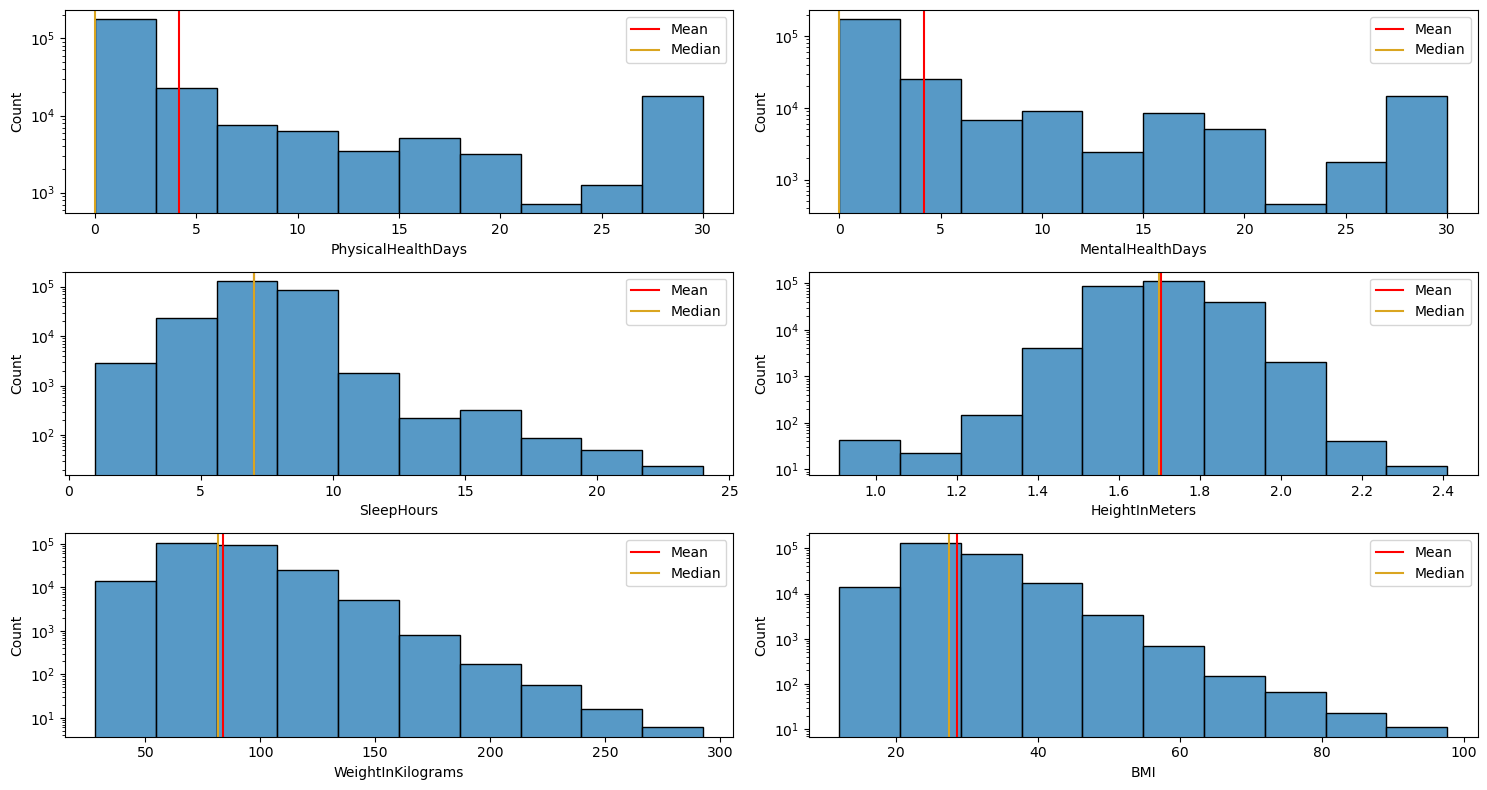

In [13]:

plt.subplots(3,5,figsize=(15,8))

plot_num=1

for col in numeric:

    values_temp=heart22[col]
    mean_temp=values_temp.mean()
    median_temp=values_temp.median()

    plt.subplot(3,2,plot_num)
    sns.histplot(values_temp,bins=10)
    plt.axvline(mean_temp, color='red', label='Mean')
    plt.axvline(median_temp, color='goldenrod',label='Median')
    plt.legend()

    plot_num+=1

plt.tight_layout()

plt.show()

The distributions are mostly right skewed, due to extreme cases. We can see that height, however, has a normal distribution. 

If we plot these histograms on a log scale, we can see a clear picture of their distributions.

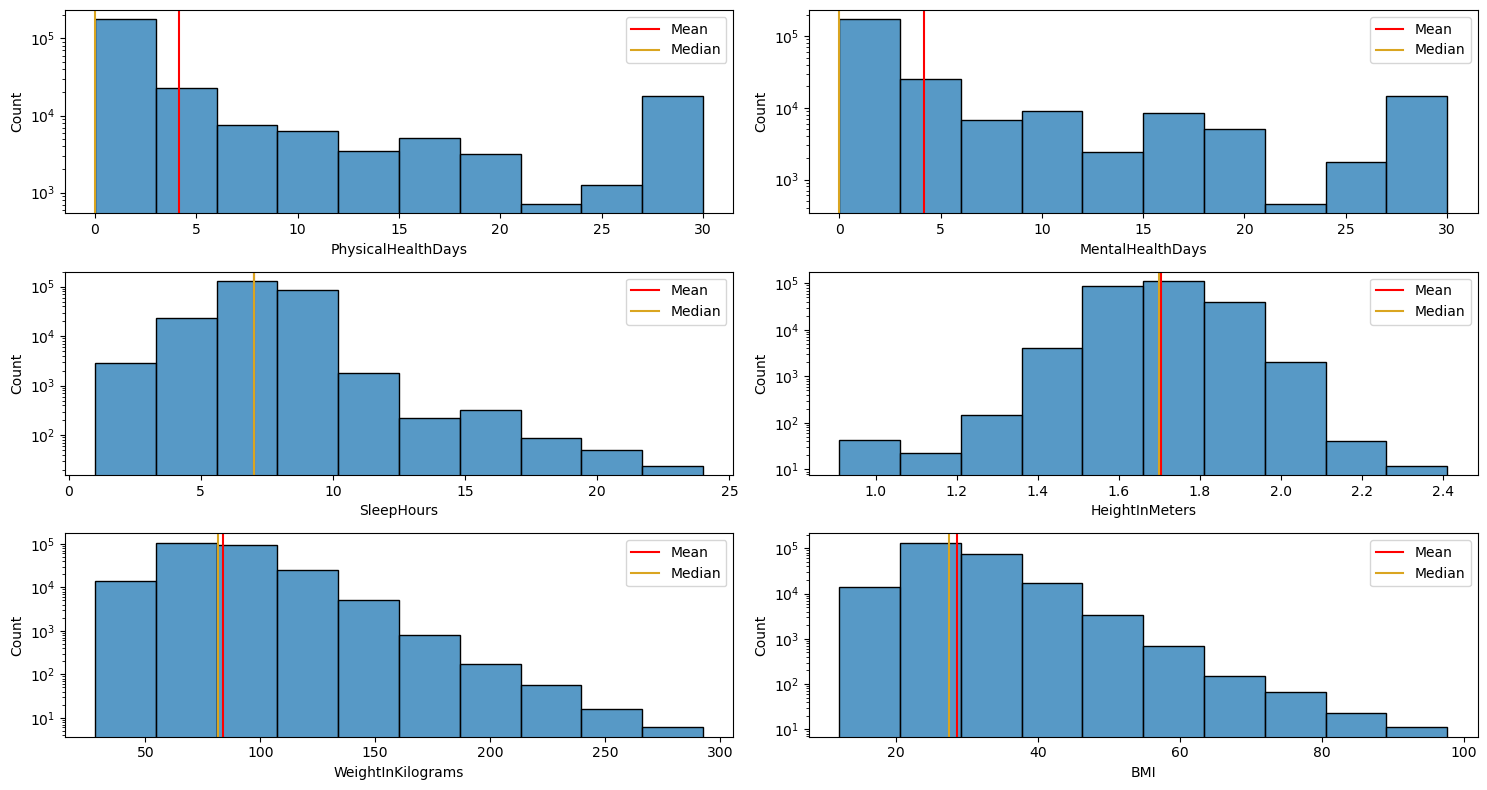

In [14]:

plt.subplots(3,5,figsize=(15,8))

plot_num=1

for col in numeric:

    values_temp=heart22[col]
    mean_temp=values_temp.mean()
    median_temp=values_temp.median()

    plt.subplot(3,2,plot_num)
    sns.histplot(values_temp,bins=10)
    plt.axvline(mean_temp, color='red', label='Mean')
    plt.axvline(median_temp, color='goldenrod',label='Median')
    plt.yscale('log')
    plt.legend()

    plot_num+=1

plt.tight_layout()

plt.show()

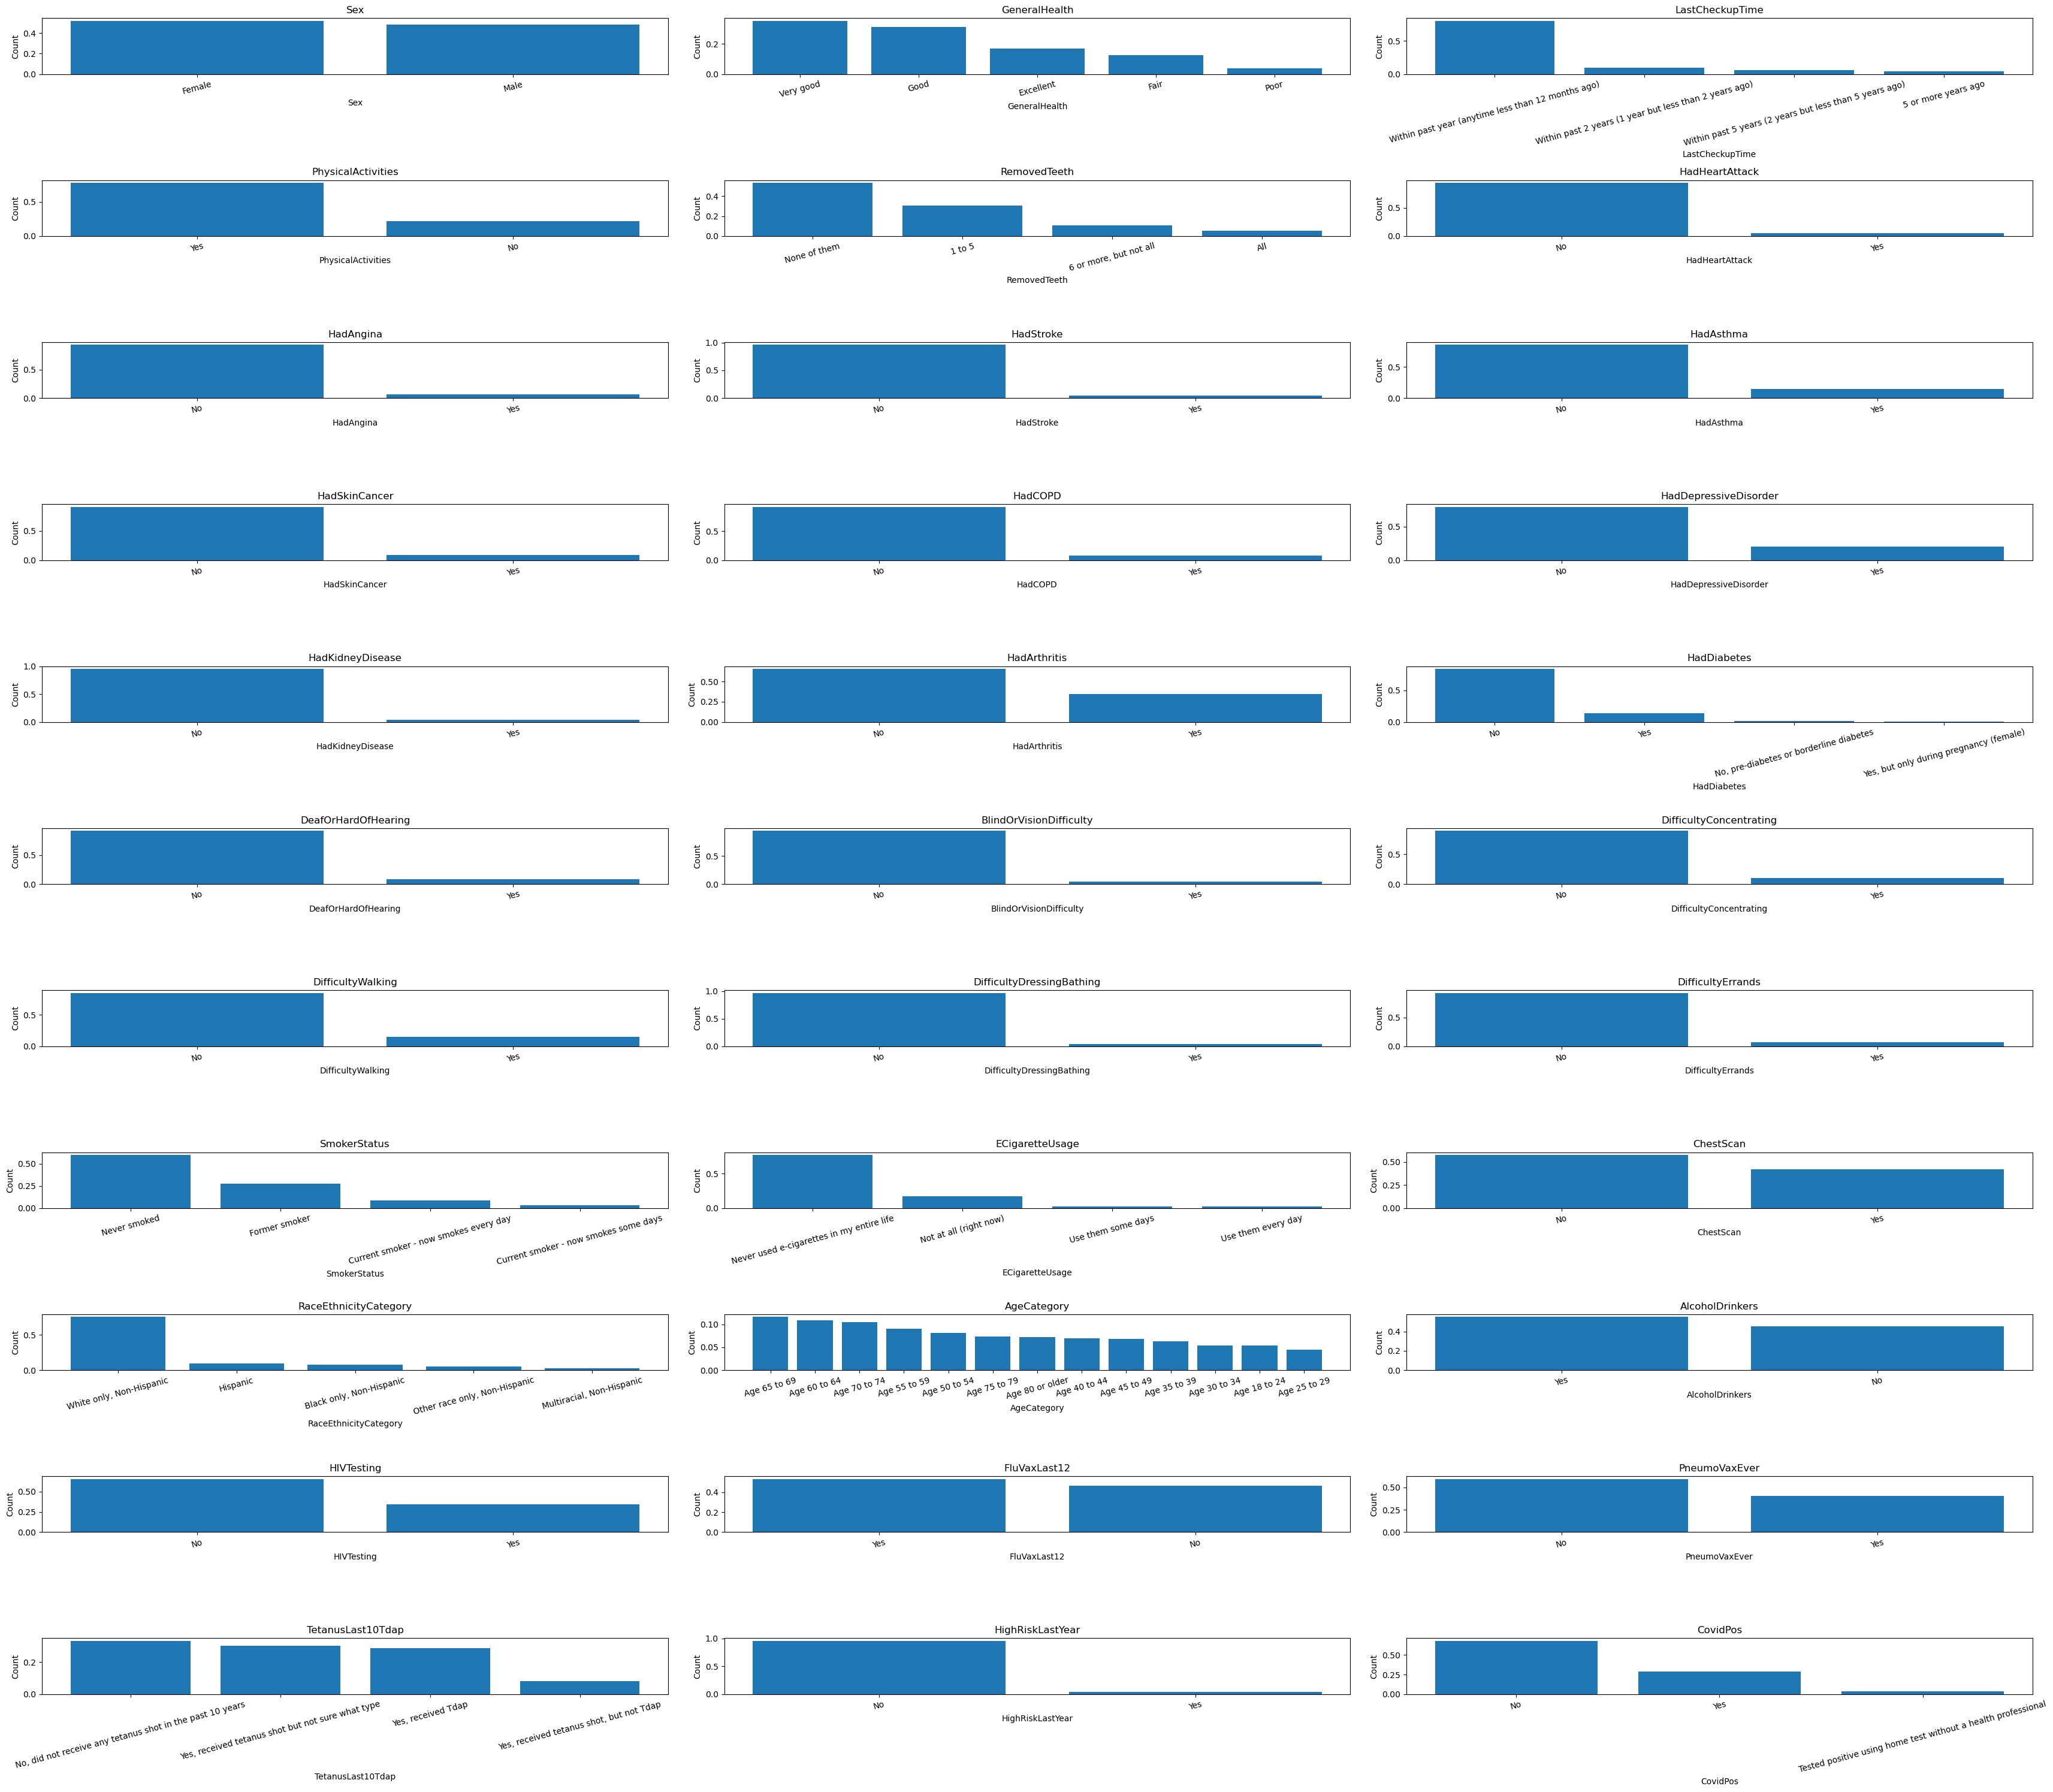

In [81]:

#*
plt.subplots(11,3,figsize=(35,30))

plot_num=1

for col in categorical:
    plt.subplot(11,3,plot_num)
    
    plt.bar(heart22[col].value_counts(normalize=True).index,
            heart22[col].value_counts(normalize=True).values)
    
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.xticks(rotation=15)

    plot_num+=1

plt.tight_layout()

plt.show()

* 
Here we can see a quick overview of each categorical column in our dataframe. Most of these columns have either 'Yes' or 'No' as their values, so these columns can easily be changed to boolean/integer datatypes. There are a few columns that will need to be encoded and some values may need to be grouped together.

Lets take a closer look at some columns that can show the distribution of our survey takers.

Firstly, what percentage does suffer from our target column, Angina or other heart disease.

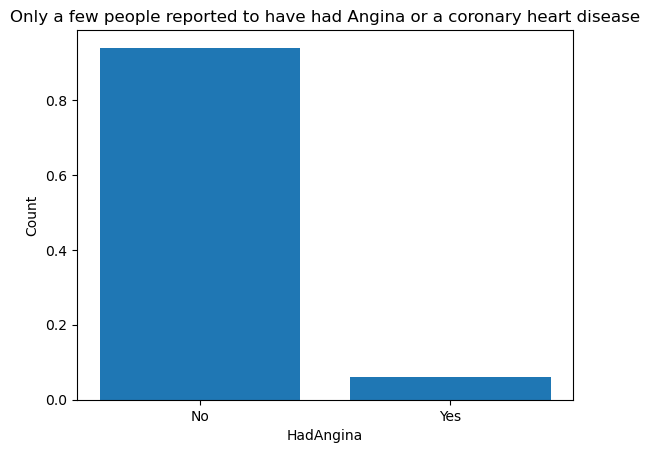

In [20]:
plt.bar(heart22['HadAngina'].value_counts(normalize=True).index,

        heart22['HadAngina'].value_counts(normalize=True).values)

plt.xlabel("HadAngina")
plt.ylabel("Count")

plt.title('Only a few people reported to have had Angina or a coronary heart disease')

plt.show()


The percentage of self-reported Angina is very small, meaning that the target is imbalanced. 
We can see that the our target value will need to be sampled to help for modelling. 

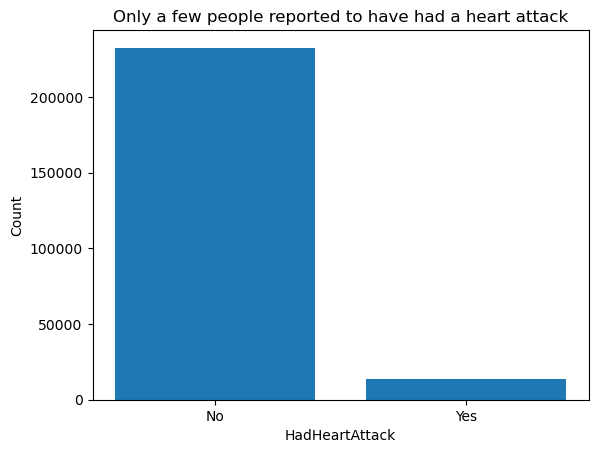

In [19]:
plt.bar(heart22['HadHeartAttack'].value_counts().index,
        heart22['HadHeartAttack'].value_counts().values)

plt.xlabel("HadHeartAttack")
plt.ylabel("Count")

plt.title('Only a few people reported to have had a heart attack')
plt.show()


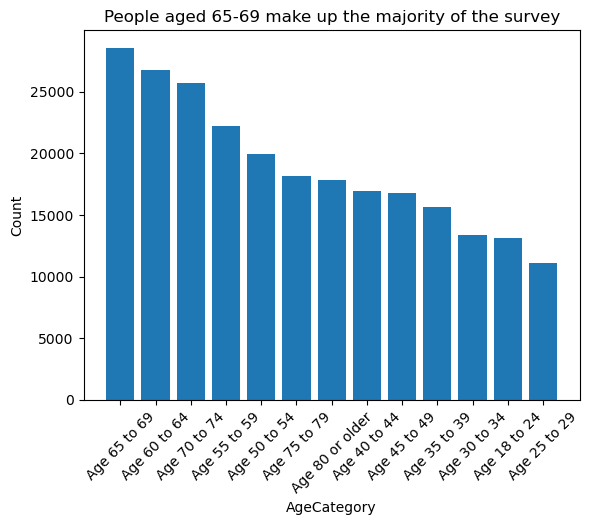

In [21]:
plt.bar(heart22['AgeCategory'].value_counts().index,
        heart22['AgeCategory'].value_counts().values)

plt.xlabel("AgeCategory")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.title('People aged 65-69 make up the majority of the survey')
plt.show()


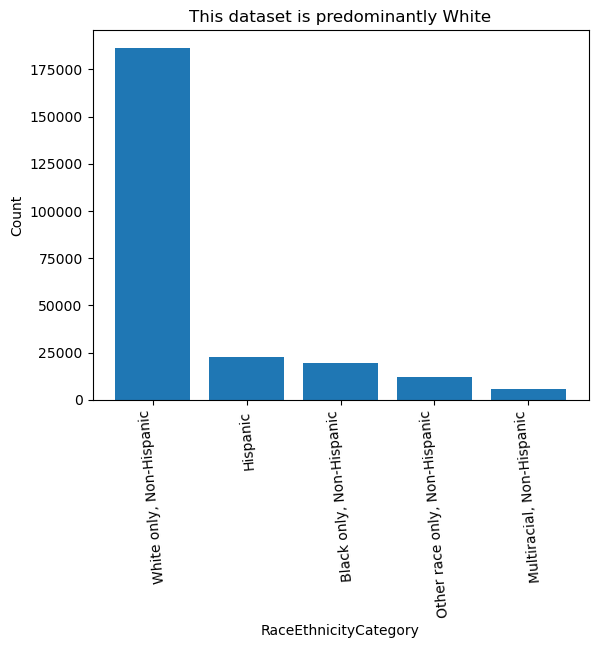

In [83]:

plt.bar(heart22['RaceEthnicityCategory'].value_counts().index,
        heart22['RaceEthnicityCategory'].value_counts().values)

plt.xlabel("RaceEthnicityCategory")
plt.ylabel("Count")
plt.xticks(rotation = 95)
plt.title('This dataset is predominantly White')

plt.show()

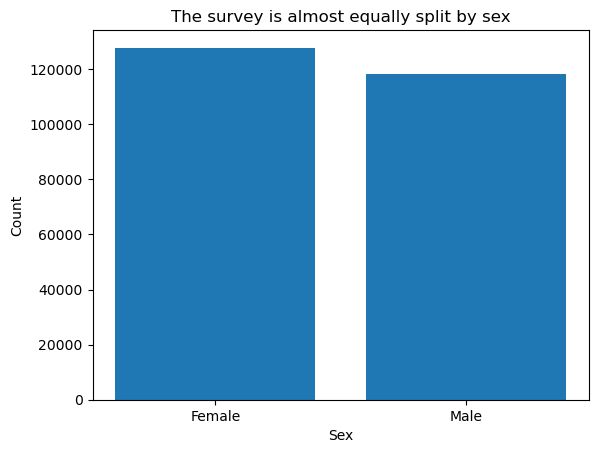

In [23]:

plt.bar(heart22['Sex'].value_counts().index,
        heart22['Sex'].value_counts().values)

plt.xlabel("Sex")
plt.ylabel("Count")

plt.title('The survey is almost equally split by sex')
plt.show()

___


2. Mapping features

In [15]:
df = heart22.copy()

Looking at the dataset, we can see that there are columns that can be binarised. This will make it easier to analyse the data and prepare it for modeling later on.

In [16]:
for x in df[['PhysicalActivities','HadHeartAttack','HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD','HadDepressiveDisorder',\
          'HadKidneyDisease','HadArthritis','DeafOrHardOfHearing','BlindOrVisionDifficulty','DifficultyConcentrating','DifficultyWalking',
          'DifficultyDressingBathing','DifficultyErrands','ChestScan','AlcoholDrinkers','HIVTesting','FluVaxLast12','PneumoVaxEver','HighRiskLastYear']]:

    df[x] = df[x].map({'Yes': 1, 'No': 0}, na_action = 'ignore')

In [17]:
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,...,1.60,71.67,27.99,0,0,1,1,"Yes, received Tdap",0,No
343,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,1,6.0,None of them,0,0,...,1.78,95.25,30.13,0,0,1,1,"Yes, received tetanus shot but not sure what type",0,No
345,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,0,8.0,"6 or more, but not all",0,0,...,1.85,108.86,31.66,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,Yes
346,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,1,9.0,None of them,0,0,...,1.70,90.72,31.32,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,Yes
347,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,1,5.0,1 to 5,0,0,...,1.55,79.38,33.07,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No


Successfully converted the string columns to 0s and 1s.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 342 to 445130
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246013 non-null  object 
 1   GeneralHealth              246013 non-null  object 
 2   PhysicalHealthDays         246013 non-null  float64
 3   MentalHealthDays           246013 non-null  float64
 4   LastCheckupTime            246013 non-null  object 
 5   PhysicalActivities         246013 non-null  int64  
 6   SleepHours                 246013 non-null  float64
 7   RemovedTeeth               246013 non-null  object 
 8   HadHeartAttack             246013 non-null  int64  
 9   HadAngina                  246013 non-null  int64  
 10  HadStroke                  246013 non-null  int64  
 11  HadAsthma                  246013 non-null  int64  
 12  HadSkinCancer              246013 non-null  int64  
 13  HadCOPD                    24601

We can save this later as a new csv for when we need to do more preprocessing.

In [19]:
df.to_csv('~/Desktop/capstone-project-Tasnimacj/data/cleaned_data/heart_bool.csv')

___


3. Bivariate Analysis

I want to compare columns with each other. First, I want to see if our target column is affected by other factors in their lives.

In [49]:
y = df['HadAngina']
X = df.select_dtypes(exclude=['object'])


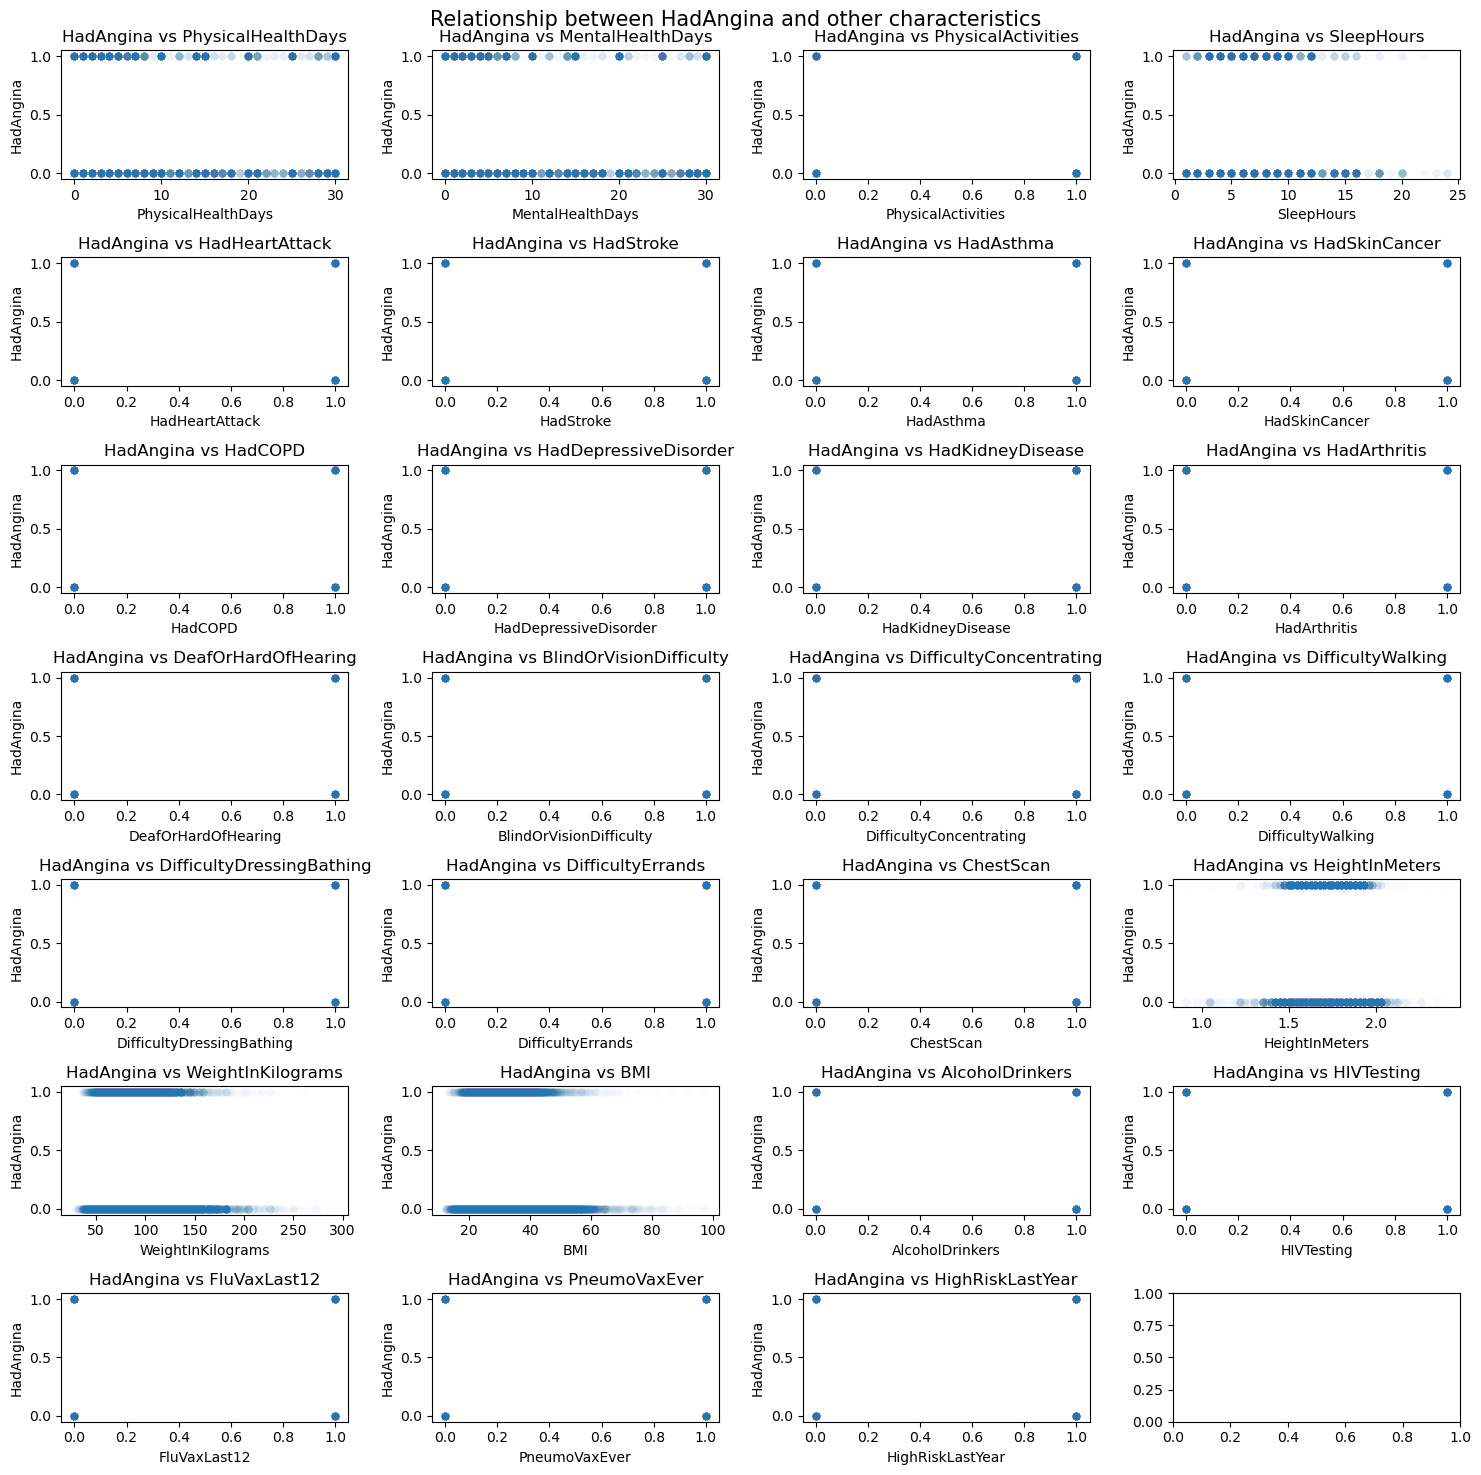

In [64]:
##
plt.subplots(7,4,figsize=(15,15))

plot_num=1

plt.suptitle("Relationship between HadAngina and other characteristics", fontsize=15)

for col in X:

    plt.subplot(7,4,plot_num)
    sns.scatterplot(x=df[col],y=y, alpha=0.01)
    plt.title(f'HadAngina vs {col}')

    plot_num+=1

plt.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()

There does not seem to be clear trends between someone suffering from heart diseases and other characteristics. 

We can have a look at the correlations between all our non-object columns, to see if there is multicolinearity.

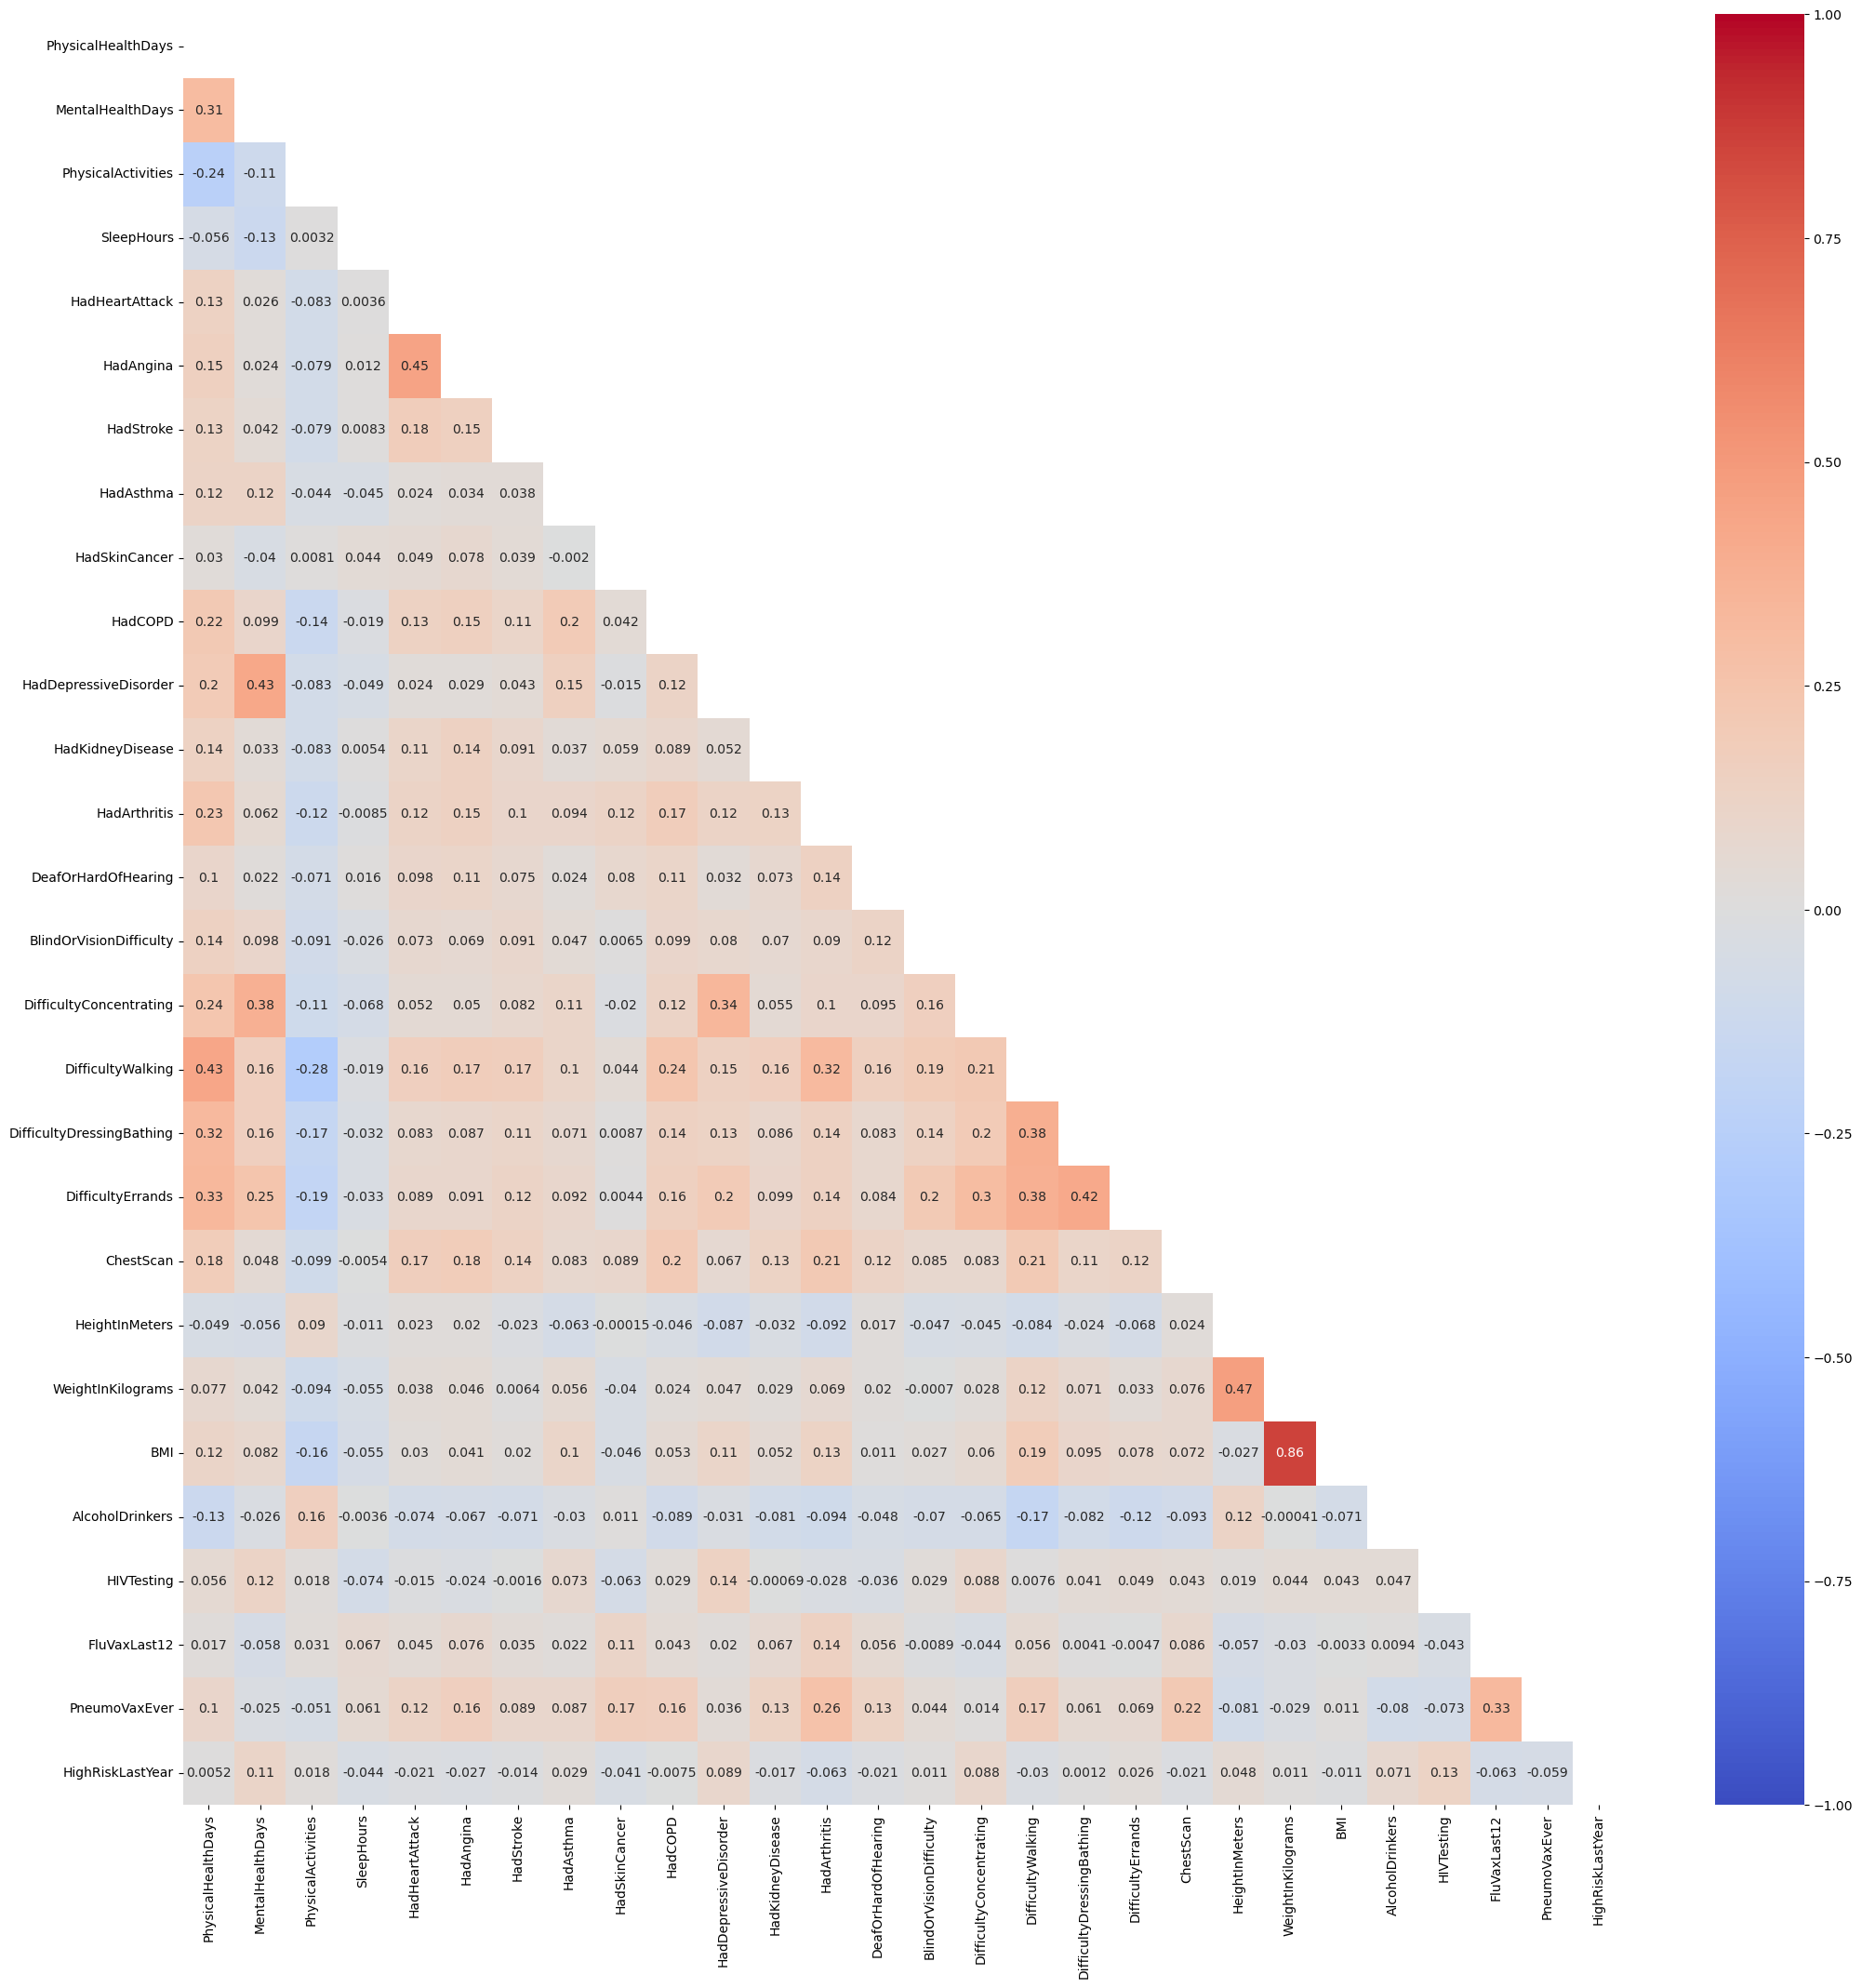

In [226]:
mask = np.triu(X.corr())
plt.figure(figsize=(25, 25))
sns.heatmap(X.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0, annot = True, mask = mask)
plt.show()

We can see that there is mostly relatively low correlations between columns, showing weak relations between columns. HadHeartAttack has a correlation of 0.45 with our target value, HadAngina. This makes sense as having a heart attack could lead to developing heart diseases and vice versa.


BMI and Weight are highly correlated. This is expected as the calculation for BMI is 
$\frac{Weight}{Height^2}$. 
To address the colinearity of these two factors, I would need to drop one column.



In [227]:
X[['WeightInKilograms','BMI']]

,WeightInKilograms,BMI
342,71.67,27.99
343,95.25,30.13
345,108.86,31.66
346,90.72,31.32
347,79.38,33.07
...,...,...
445117,102.06,32.28
445123,90.72,24.34
445124,83.91,29.86
445128,83.01,28.66


In [228]:
X.drop('WeightInKilograms', axis=1, inplace=True)

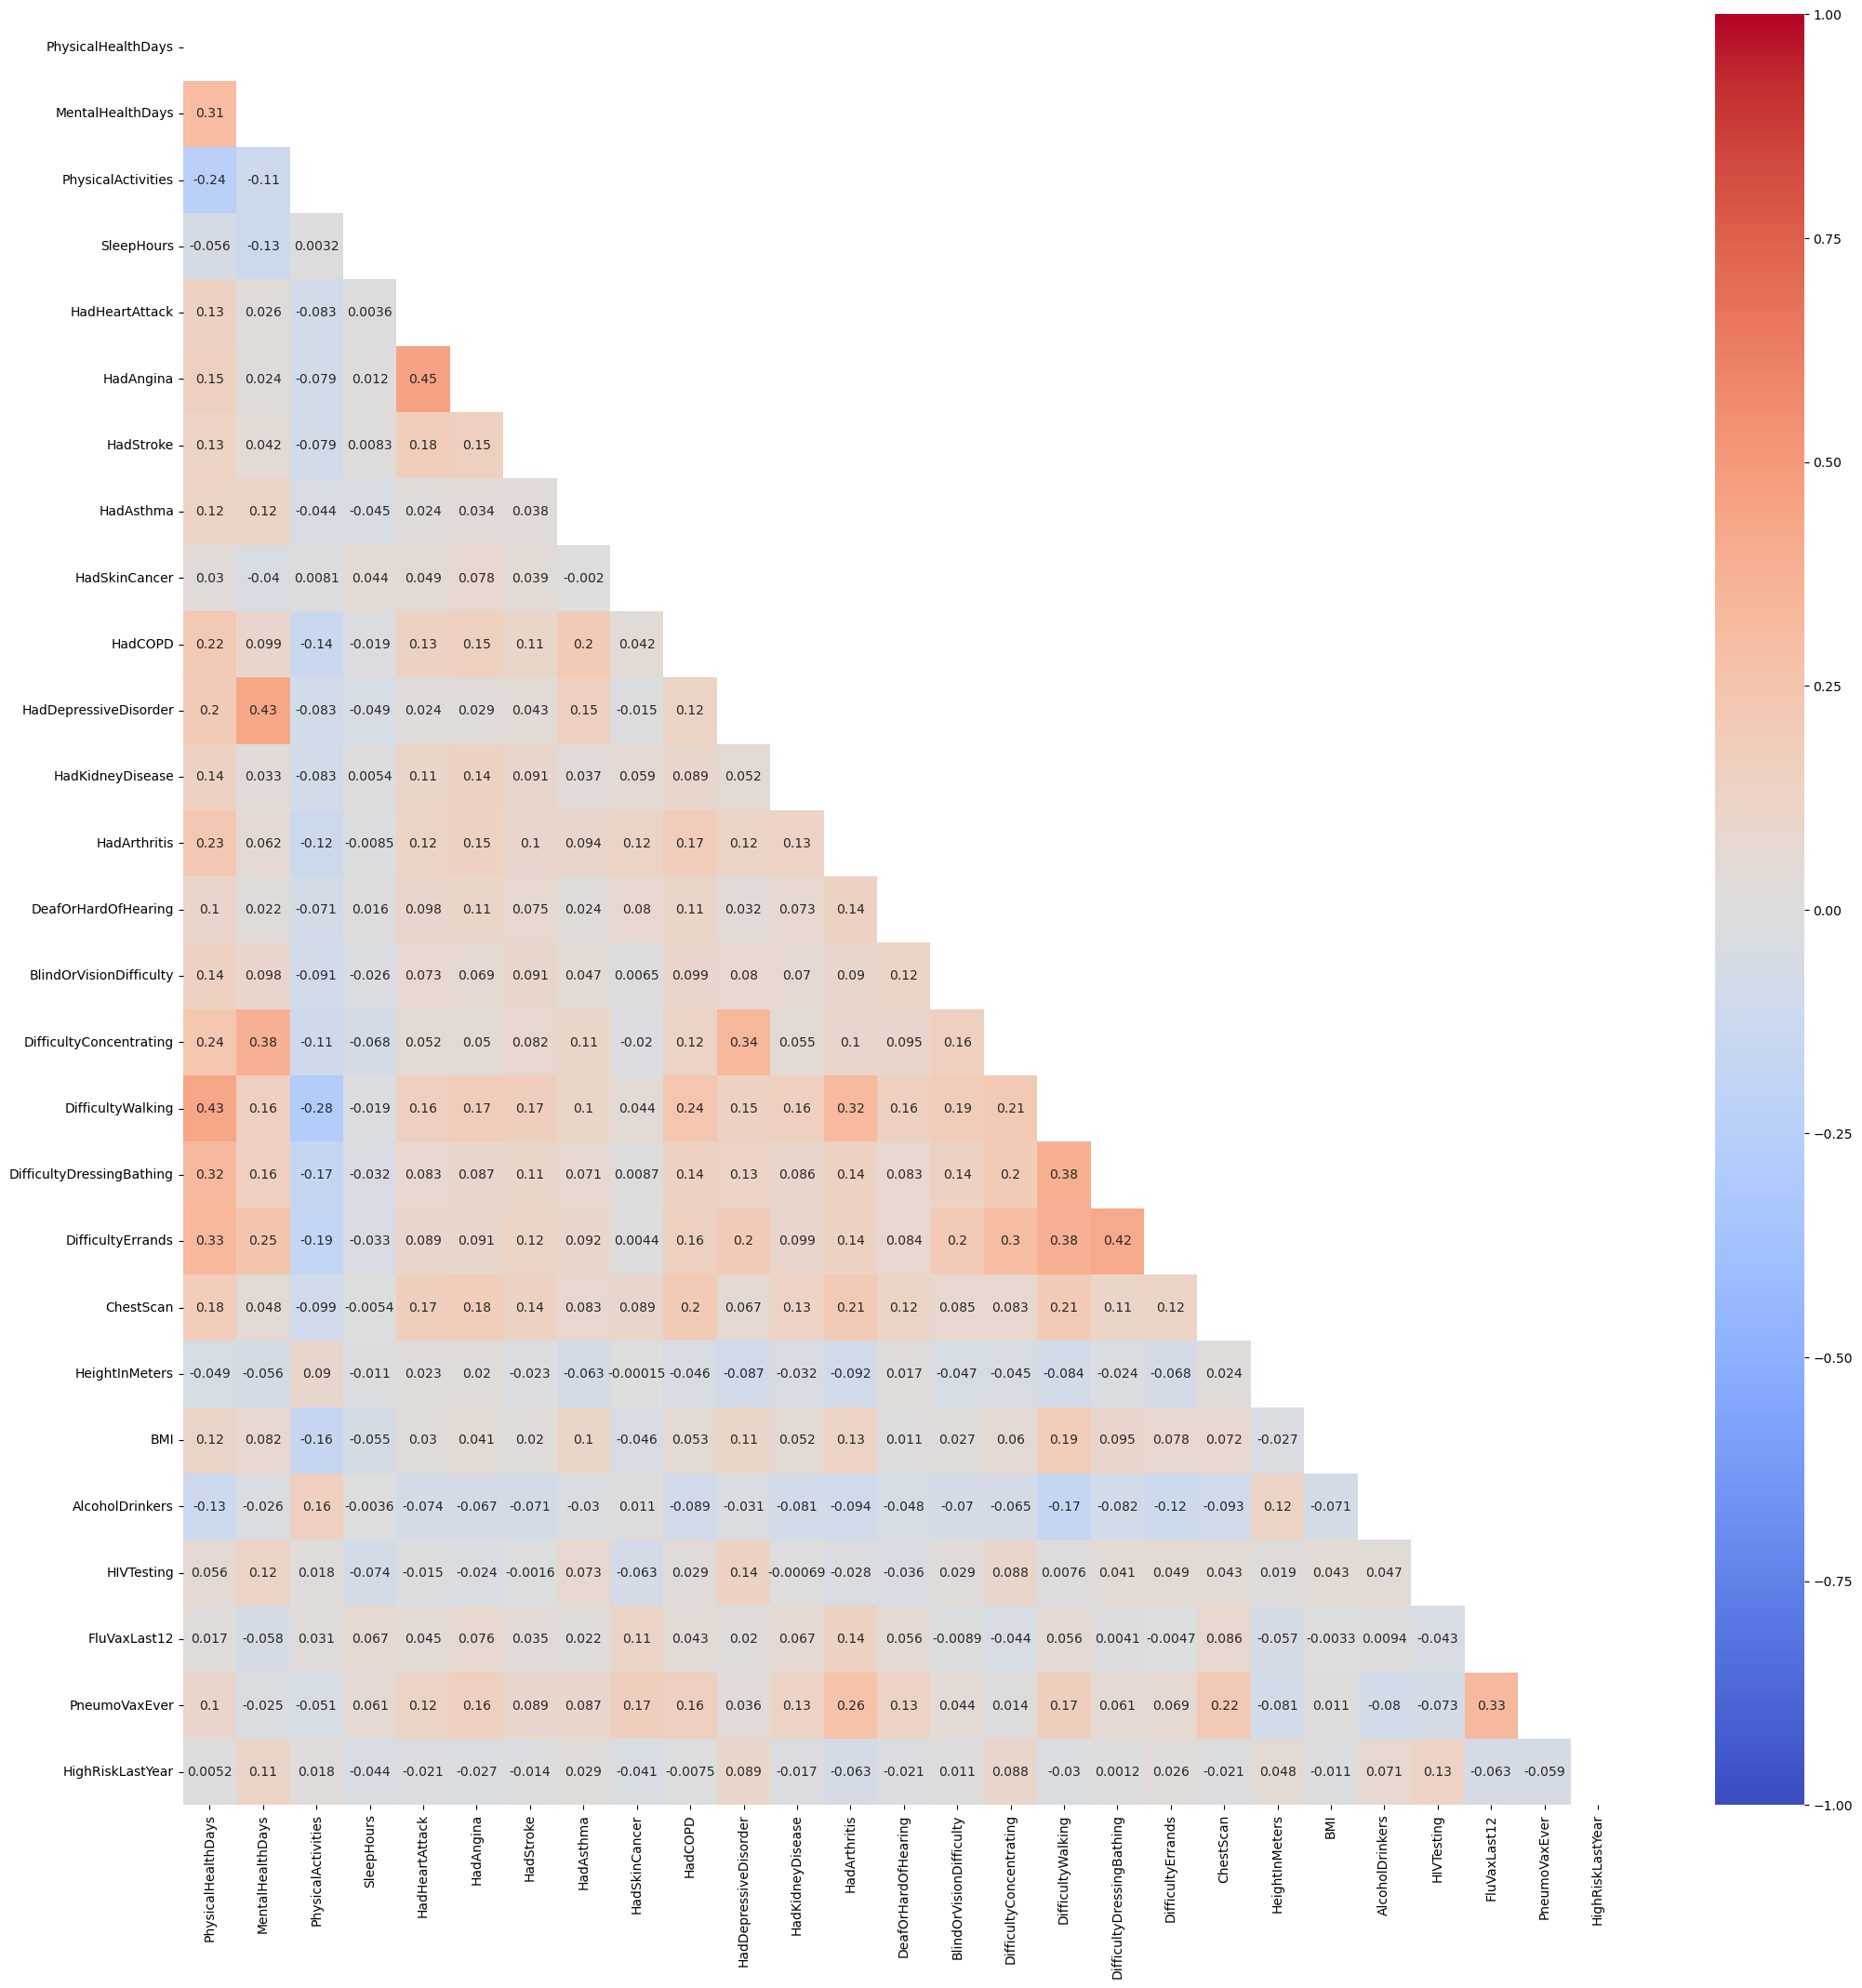

In [229]:
mask = np.triu(X.corr())
plt.figure(figsize=(25, 25))
sns.heatmap(X.corr(), cmap="coolwarm", vmax=1.0, vmin=-1.0, annot = True, mask = mask)
plt.show()

Now, there is no strong relationships between feature variables.

#### pearsonr test



In [230]:
from scipy.stats import pearsonr

In [231]:
y = df['HadAngina']

In [232]:
for col in X:
    r_val,p_val = pearsonr(df[col],y)
    print( df[col].name + f' Pearson r test:\n r = {round(r_val,5)}, p value = {round(p_val,5)}')
    
    

PhysicalHealthDays Pearson r test:
 r = 0.14913, p value = 0.0
MentalHealthDays Pearson r test:
 r = 0.02408, p value = 0.0
PhysicalActivities Pearson r test:
 r = -0.07876, p value = 0.0
SleepHours Pearson r test:
 r = 0.01154, p value = 0.0
HadHeartAttack Pearson r test:
 r = 0.4459, p value = 0.0
HadAngina Pearson r test:
 r = 1.0, p value = 0.0
HadStroke Pearson r test:
 r = 0.15189, p value = 0.0
HadAsthma Pearson r test:
 r = 0.03439, p value = 0.0
HadSkinCancer Pearson r test:
 r = 0.07762, p value = 0.0
HadCOPD Pearson r test:
 r = 0.15396, p value = 0.0
HadDepressiveDisorder Pearson r test:
 r = 0.0285, p value = 0.0
HadKidneyDisease Pearson r test:
 r = 0.14469, p value = 0.0
HadArthritis Pearson r test:
 r = 0.14586, p value = 0.0
DeafOrHardOfHearing Pearson r test:
 r = 0.10895, p value = 0.0
BlindOrVisionDifficulty Pearson r test:
 r = 0.06912, p value = 0.0
DifficultyConcentrating Pearson r test:
 r = 0.04958, p value = 0.0
DifficultyWalking Pearson r test:
 r = 0.17217, 

Looking at the target variable,HadAngina, and its correlation between the other non object columns, we can see that p values are very small. We can say that the correlations are statistically significant.

 Concluding that there is no correlation between X and y.

___


4.  Baseline Modelling

In this notebook, I will just do a 'dumb' baseline logistic model with the current X and y.

In [57]:
y = df['HadAngina'] # Target Variables
X.drop('HadAngina', axis=1, inplace=True) # Features

In [58]:
X.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'PhysicalActivities',
       'SleepHours', 'HadHeartAttack', 'HadStroke', 'HadAsthma',
       'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease',
       'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear'],
      dtype='object')

In [59]:
import statsmodels.api as sm   

X_withconstant = sm.add_constant(X)

In [60]:
#* 
df_reg = sm.Logit(y, X_withconstant)

reg_Fitted = df_reg.fit()

reg_Fitted.summary()

Optimization terminated successfully.
         Current function value: 0.161175
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HadAngina   No. Observations:               246013
Model:                          Logit   Df Residuals:                   245985
Method:                           MLE   Df Model:                           27
Date:                Fri, 03 Nov 2023   Pseudo R-squ.:                  0.2965
Time:                        15:05:06   Log-Likelihood:                -39651.
converged:                       True   LL-Null:                       -56365.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -6.6799      0.642    -10.413      0.000      -7.937      -5.423
PhysicalHealthDays            0.0146      0.001     13.435      0.000       0.012       0.017
MentalHealthDays             -0.0034      0.001     -2.507      0.012      -0.006      -0.001
PhysicalActivities           -0.0290      0.023     -1.245      0.213      -0.075       0.017
SleepHours                    0.0139      0.006      2.313      0.021       0.002       0.026
HadHeartAttack                2.7010      0.022    120.097      0.000       2.657       2.745
HadStroke                     0.4777      0.032     14.778      0.000       0.414       0.541
HadAsthma                    -0.0723      0.027     -2.678      0.007      -0.125      -0.019
HadSkinCancer                 0.3443      0.028     12.318      0.000       0.289       0.399
HadCOPD                       0.4614      0.027     16.823      0.000       0.408       0.515
HadDepressiveDisorder        -0.0547      0.027     -2.006      0.045      -0.108      -0.001
HadKidneyDisease              0.6741      0.031     21.915      0.000       0.614       0.734
HadArthritis                  0.3964      0.022     18.407      0.000       0.354       0.439
DeafOrHardOfHearing           0.3219      0.027     11.986      0.000       0.269       0.374
BlindOrVisionDifficulty       0.1152      0.036      3.166      0.002       0.044       0.187
DifficultyConcentrating       0.0097      0.032      0.299      0.765      -0.054       0.073
DifficultyWalking             0.2648      0.027      9.862      0.000       0.212       0.317
DifficultyDressingBathing    -0.0393      0.043     -0.905      0.366      -0.124       0.046
DifficultyErrands            -0.0231      0.036     -0.642      0.521      -0.094       0.047
ChestScan                     0.8632      0.023     37.510      0.000       0.818       0.908
HeightInMeters                1.0211      0.377      2.707      0.007       0.282       1.760
WeightInKilograms             0.0032      0.004      0.903      0.367      -0.004       0.010
BMI                          -0.0011      0.010     -0.104      0.917      -0.021       0.019
AlcoholDrinkers              -0.0944      0.021     -4.576      0.000      -0.135      -0.054
HIVTesting                   -0.2316      0.022    -10.360      0.000      -0.275      -0.188
FluVaxLast12                  0.2208      0.022      9.888      0.000       0.177       0.265
PneumoVaxEver                 0.6286      0.023     27.335      0.000       0.584       0.674
HighRiskLastYear             -0.2965      0.066     -4.493      0.000      -0.426      -0.167
=============================================================================================
"""

This is not a great model and would not be useful. We can see there are p values that go over our 0.05 threshold. If we iterate the model again, we would need to remove these coefficients. 

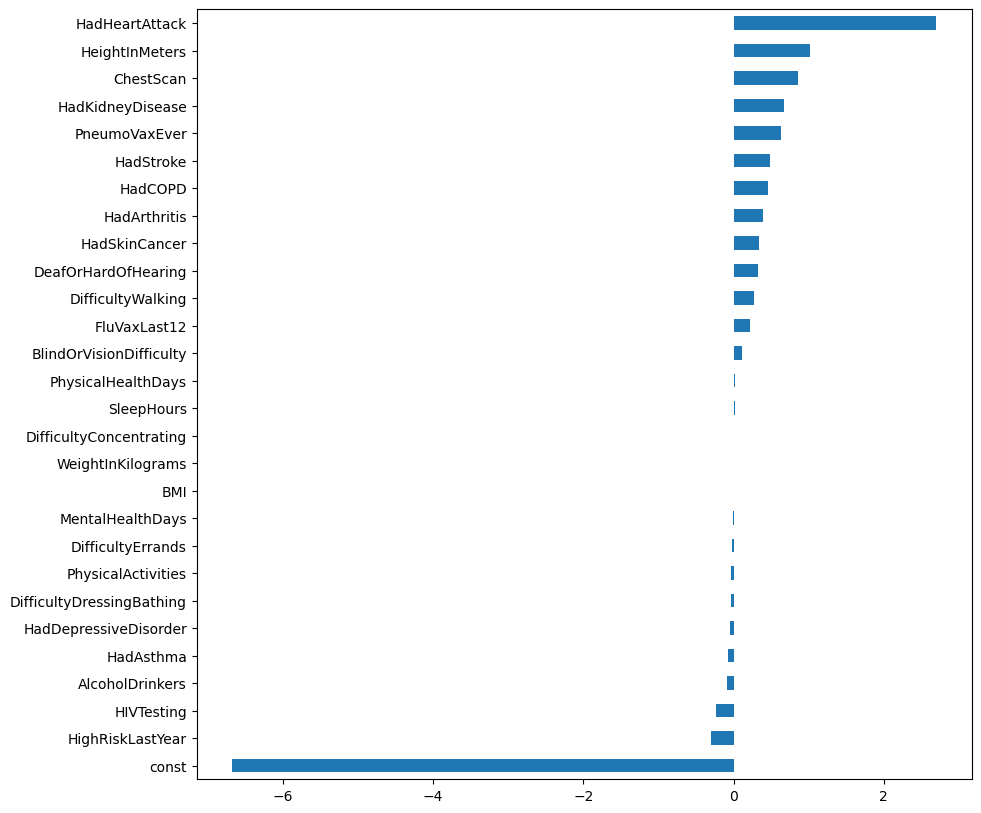

In [61]:
plt.figure(figsize=(10,10))
reg_Fitted.params.sort_values().plot(kind='barh')
plt.show()

In [43]:
reg_Fitted.params.sort_values()

const                       -6.679898
HighRiskLastYear            -0.296495
HIVTesting                  -0.231559
AlcoholDrinkers             -0.094366
HadAsthma                   -0.072288
HadDepressiveDisorder       -0.054693
DifficultyDressingBathing   -0.039259
PhysicalActivities          -0.028974
DifficultyErrands           -0.023129
MentalHealthDays            -0.003430
BMI                         -0.001074
WeightInKilograms            0.003226
DifficultyConcentrating      0.009654
SleepHours                   0.013851
PhysicalHealthDays           0.014632
BlindOrVisionDifficulty      0.115228
FluVaxLast12                 0.220756
DifficultyWalking            0.264754
DeafOrHardOfHearing          0.321869
HadSkinCancer                0.344273
HadArthritis                 0.396387
HadCOPD                      0.461444
HadStroke                    0.477654
PneumoVaxEver                0.628595
HadKidneyDisease             0.674116
ChestScan                    0.863246
HeightInMete

In [62]:
beta0 = reg_Fitted.params[0]
beta5 = reg_Fitted.params[5]

In [63]:
odds0 = np.exp(beta0)
odds5 = np.exp(beta5)
print(odds0, '', odds5)

0.0012559055354256735  14.894163666785373


The odds of someone developing heart disease, who has no other characteristic is 0.00125.

The odds of someone developing heart disease, who has previously had a heart attack is 14.894.

___


5. Conclusion

We have found that so far features do not impact our target value as much as I initially thought.
Next, I will preprocess all the data in attempts to create a better model.